In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [33]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [34]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [35]:
df.shape

(10000, 14)

In [36]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [37]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [39]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [40]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [41]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [42]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [43]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [45]:
X_train_trf

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [46]:
X_test_trf

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [47]:
# Importing TensorFlow, a popular open-source machine learning framework.
import tensorflow

# Importing the keras module from TensorFlow, which provides high-level building blocks for developing neural networks.
from tensorflow import keras

# Importing the Sequential model from the keras module, which allows us to create models layer-by-layer.
from tensorflow.keras import Sequential

# Importing the Dense layer from the keras.layers module, which represents a fully connected layer in a neural network.
from tensorflow.keras.layers import Dense

In [48]:
# Creating a Sequential model, which allows building models layer-by-layer.
model = Sequential()

# Adding a Dense layer to the model with 11 units/neurons, using the ReLU activation function,
# and specifying the input dimension as 11.
model.add(Dense(11, activation='relu', input_dim=11))

# Adding another Dense layer to the model with 11 units/neurons, using the ReLU activation function.
model.add(Dense(11, activation='relu'))

# Adding another Dense layer to the model with 1 unit/neuron, using the sigmoid activation function.
model.add(Dense(1, activation='sigmoid'))

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_4 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 12        
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Compiling the model with binary crossentropy as the loss function,
# Adam optimizer for optimization, and accuracy as the metric to evaluate the model.
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [51]:
# Training the model on the training data.
# X_train_trf: The transformed features of the training data.
# y_train: The labels of the training data.
# epochs=100: Number of epochs (iterations over the entire training dataset).
# validation_split=0.2: Fraction of the training data to be used as validation data.
history = model.fit(X_train_trf, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.6237 - accuracy: 0.6519 - val_loss: 0.4954 - val_accuracy: 0.7969
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4745 - accuracy: 0.7959 - val_loss: 0.4542 - val_accuracy: 0.7969
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.7997 - val_loss: 0.4331 - val_accuracy: 0.8069
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.8184 - val_loss: 0.4206 - val_accuracy: 0.8250
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8316 - val_loss: 0.4113 - val_accuracy: 0.8281
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8377 - val_loss: 0.4011 - val_accuracy: 0.8350
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3861 - accuracy: 0.8450 - val_loss: 0.3899 - val_accuracy: 0.8344

In [52]:
# 121 Weights and 11 bias
model.layers[0].get_weights()

[array([[-4.72475141e-02,  3.96063067e-02,  9.93193388e-02,
         -4.00793590e-02, -1.70899451e-01, -1.27391547e-01,
         -4.66365777e-02,  1.39370998e-02, -1.29994554e-02,
         -1.86806664e-01, -1.05974689e-01],
        [ 3.55878510e-02,  3.15133274e-01,  4.04618829e-02,
          7.39174902e-01,  1.37468195e+00,  1.90282226e-01,
          2.01683026e-02,  1.93471283e-01, -4.55685645e-01,
         -6.34521365e-01, -7.59129584e-01],
        [-9.98995360e-03,  1.31209046e-01, -3.74279767e-01,
          5.93521714e-01, -6.70343459e-01,  2.31145874e-01,
          3.56209390e-02,  4.33563106e-02, -7.18398318e-02,
         -5.70959806e-01,  5.01290202e-01],
        [ 6.06644690e-01, -2.83365101e-01, -5.31139553e-01,
         -2.37640768e-01, -2.06574351e-01, -5.76405346e-01,
         -3.85608286e-01, -7.09175169e-02,  8.81307200e-02,
         -2.54353732e-01,  5.27306497e-02],
        [ 5.84330738e-01,  6.88768268e-01, -3.01762760e-01,
         -2.77459830e-01,  2.14888722e-01,  

In [53]:
model.layers[1].get_weights()

[array([[ 0.7120391 ,  0.40958783,  0.27838534, -1.1694651 ,  0.6936525 ,
         -0.24828443, -0.48258784, -0.69147086, -0.23208912,  0.29845563,
          0.16344793],
        [-0.03815256, -1.3978852 , -0.55745316, -0.6215031 , -0.37276578,
          0.23590547,  0.4938017 ,  0.2443756 ,  0.03361142,  0.34441525,
          0.35262603],
        [ 0.42608094, -0.42001715,  0.35191622, -0.21688059,  0.3558484 ,
         -0.05625498,  0.11668095,  0.02984904,  0.14762534,  0.11190924,
          0.79832256],
        [ 0.1920289 , -0.7006661 , -0.20016304, -0.9149236 ,  0.15921183,
          0.14060637,  0.69531476,  0.25562683, -0.33675015, -0.7771856 ,
         -0.5330897 ],
        [ 0.21222973,  0.42828566, -0.49400604,  0.39580867, -0.00882574,
         -0.01019631,  0.49510202,  0.49461123, -0.47436783, -0.2510267 ,
         -0.43927184],
        [ 0.44910917,  0.03493307,  0.4676403 , -0.998006  , -0.08890831,
         -0.95668125, -0.31053773,  0.16273671,  0.28518426,  0.0996578

In [54]:
model.layers[2].get_weights()

[array([[ 0.93015975],
        [ 1.1554402 ],
        [-0.7787516 ],
        [ 1.4142816 ],
        [ 0.90317714],
        [ 0.7198468 ],
        [-0.90440863],
        [-0.5791655 ],
        [-0.8471553 ],
        [ 0.80294454],
        [-0.8085412 ]], dtype=float32),
 array([0.00407321], dtype=float32)]

In [55]:
y_log = model.predict(X_test_trf)

In [56]:
#threshold
y_pred = np.where(y_log>0.5 , 1 ,0)

In [57]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.8575

In [58]:
history

In [59]:
history.history

{'loss': [0.623654305934906,
  0.4744910001754761,
  0.4408830404281616,
  0.42171940207481384,
  0.4085107147693634,
  0.39751267433166504,
  0.3860994279384613,
  0.3751746118068695,
  0.3650665283203125,
  0.3574095070362091,
  0.3510105013847351,
  0.34651097655296326,
  0.34361934661865234,
  0.3416781723499298,
  0.34009093046188354,
  0.33882567286491394,
  0.33772751688957214,
  0.3378922939300537,
  0.3369835913181305,
  0.3363872468471527,
  0.3355376124382019,
  0.33479198813438416,
  0.33519116044044495,
  0.3346155285835266,
  0.3340451717376709,
  0.3332309424877167,
  0.33306118845939636,
  0.33292511105537415,
  0.3325180113315582,
  0.33222854137420654,
  0.33143696188926697,
  0.33210453391075134,
  0.3310457170009613,
  0.3311029076576233,
  0.3304818868637085,
  0.33026596903800964,
  0.33033135533332825,
  0.32912197709083557,
  0.32893458008766174,
  0.3284815549850464,
  0.32802653312683105,
  0.3280007243156433,
  0.3273165822029114,
  0.32684361934661865,
  0.3

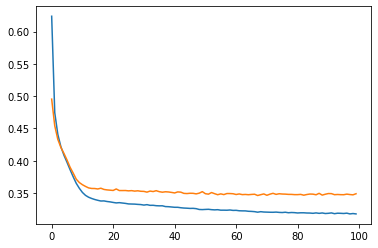

In [60]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

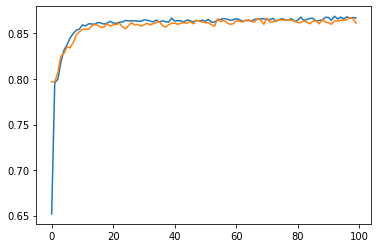

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])